<a href="https://colab.research.google.com/github/2hyeonjong/kaggle/blob/master/Titanic/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

프로세스
1. 데이터셋 변수 이해 및 확인 - 각 변수들이 무엇을 듯하는지 이해, null data 확인 및 수정
2. 여러 feature을 개별적으로 분석하고 이들의 상관관계 확인, visualization을 통해 getting an insight.
3. 모델의 성능을 높이기 위해 feature들을 engineering one-hot encoding, class 나누기, 구간 나누기 텍스트 처리 등 Feature Engineering
4. sklearn을 사용하여 모델 형성
5. 모델 학습 및 예측
6. 모델 성능 평가

In [2]:
##드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale = 2.5)
'''mat의 기본 scheme을 사용 않고 seaborn scheme을 세팅, 
일일이 graph의 font size을 지정 할 필요 없이 seaborn 의 font_scale을 사용하면 편하다.'''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'mat의 기본 scheme을 사용 않고 seaborn scheme을 세팅, \n일일이 graph의 font size을 지정 할 필요 없이 seaborn 의 font_scale을 사용하면 편하다.'

In [25]:
train = pd.read_csv('/content/drive/My Drive/kaggle/Titanic/input/train.csv')
test = pd.read_csv('/content/drive/My Drive/kaggle/Titanic/input/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
train.describe()
#pandas dataframe의 describe()메소드, 이를 쓰면 각 feature가 가진 통계치 반환
#표준편차, 평균, 최소,최대값

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


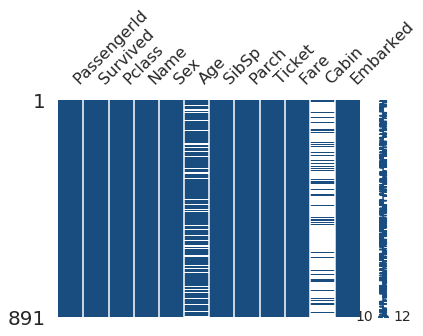

In [32]:
msno.matrix(df = train.iloc[:,:], figsize = (6,4),color = (0.1,0.3,0.5))

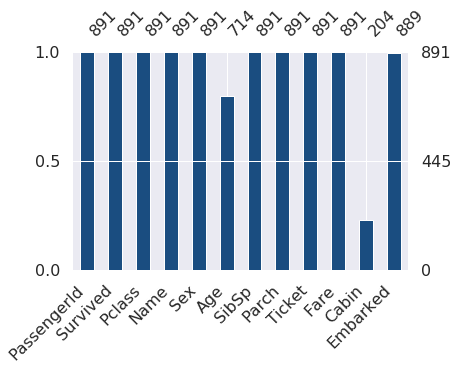

In [33]:
msno.bar(df = train.iloc[:,:], figsize = (6,4),color = (0.1,0.3,0.5))

### <font color = '#0188AA'>Target label 확인

* target label이 어떤 distribution을 가지는 지 확인 
(여기서 Target은 Survived (1,0으로 이루어짐))
* 지금 같은 이진분류의 문제의 경우 1과 0의 분포가 어떠한가에 따라 모델의 평가 방법이 달라질 수 있다.

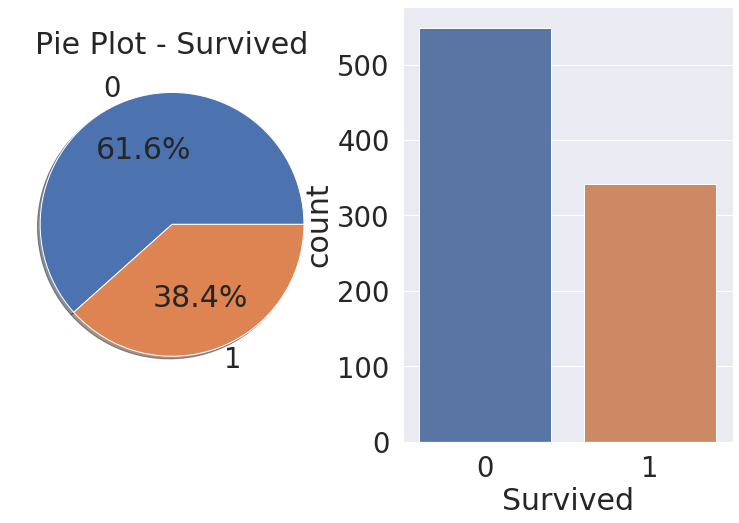

In [34]:
f, ax = plt.subplots(1, 2, figsize = (13,8))

# left
train['Survived'].value_counts().plot.pie(x = [0,0,1], autopct = '%1.1f%%',
                                          ax = ax[0], shadow= True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

#right
sns.countplot('Survived', data =train,ax = ax[1])

In [0]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked='True', figsize=(10,5))

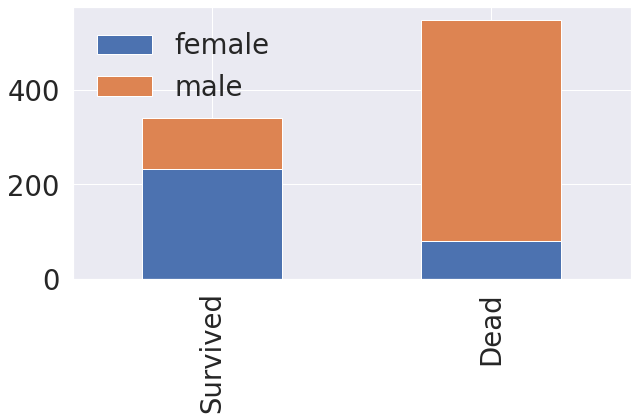

In [36]:
bar_chart('Sex')

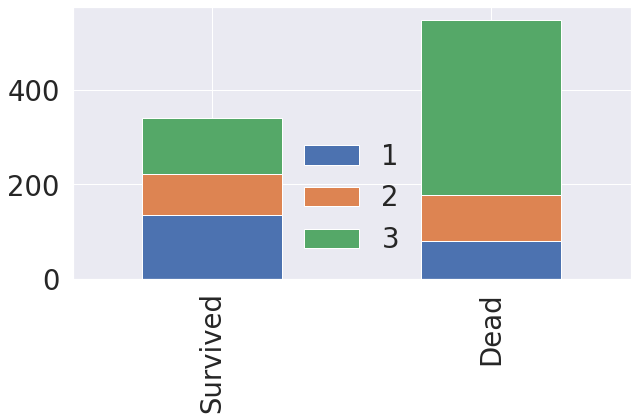

In [37]:
bar_chart('Pclass')

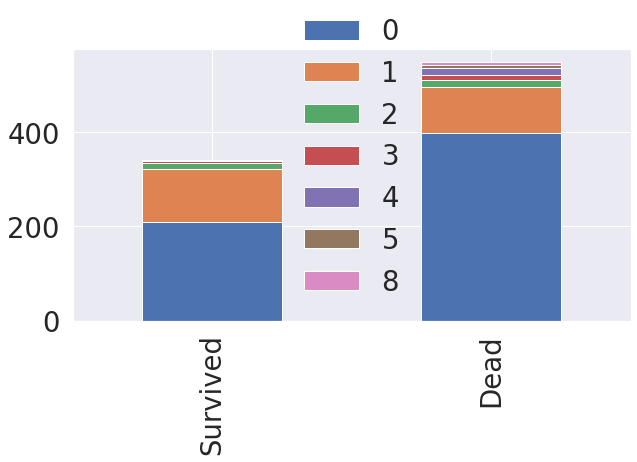

In [38]:
bar_chart('SibSp')

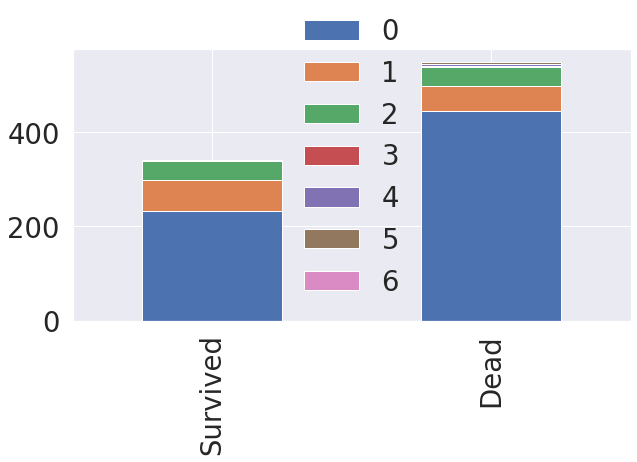

In [39]:
bar_chart('Parch')

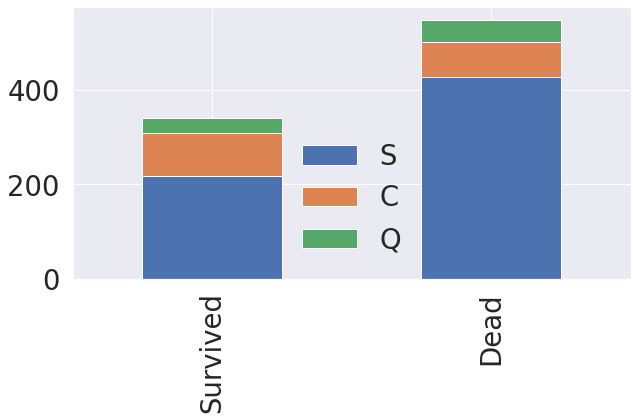

In [40]:
bar_chart('Embarked')

In [0]:
################## 데이터 가공 Feature Engineering ####################
## Carbin과 Ticket 두 값은 삭제한다. (값이 비어잇고 연관성이 없다는 판단하에)
train = train.drop(['Cabin','Ticket'], axis =1)
test = test.drop(['Cabin','Ticket'], axis =1)

In [42]:
test.head()
#test.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [43]:
## Embarked 값 가공
southamphton = train[train["Embarked"] == "S"].shape[0]
print("S : ", southamphton)
queenstown = train[train["Embarked"] == "Q"].shape[0]
print("Q : ", queenstown)
cherbourg = train[train["Embarked"] == "C"].shape[0]
print("C : ", cherbourg)

S :  644
Q :  77
C :  168


In [0]:
#비어있는 Embarked값은 "S"로
train = train.fillna({'Embarked' : 'S'})
#각 값을 숫자로 변경
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

In [45]:
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [46]:
combine = [train, test]

for data in combine : 
  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [47]:
for data in combine:
  data['Title'] = data['Title'].replace(['Lady','Capt','Col','Countess','Don','Dr','Jonkheer','Major',
                                          'Mle','Rev','Sir'], 'Rare')
  data['Title'] = data['Title'].replace('Ms', 'Miss')
  data['Title'] = data['Title'].replace('Mlle', 'Miss')
  data['Title'] = data['Title'].replace('Mme', 'Miss')


train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [48]:
title_mapping = {"Mr": 1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for data in combine:
  data['Title'] = data['Title'].map(title_mapping)
  data['Title'] = data['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [49]:
#Name과 PID 삭제
train = train.drop(['Name', 'PassengerId'], axis= 1)
test = test.drop(['Name'], axis =1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [50]:
combine = [train, test]

for data in combine:
  data['Sex'] = data['Sex'].map({"male": 0, "female": 1})

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [0]:
#Age값 가공하기
train['Age'].fillna(train['Age'].mean(), inplace =True)
test['Age'].fillna(train['Age'].mean(), inplace =True)

In [52]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Title          418 non-null float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [53]:
train['FareBand']= pd.qcut(train['Fare'], 4, labels = [1,2,3,4])
test['FareBand']= pd.qcut(test['Fare'], 4, labels = [1,2,3,4])

train = train.drop(['Fare'], axis =1)
test = test.drop(['Fare'], axis =1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBand
0,0,3,0,22.0,1,0,1,1,1
1,1,1,1,38.0,1,0,2,3,4
2,1,3,1,26.0,0,0,1,2,2
3,1,1,1,35.0,1,0,1,3,4
4,0,3,0,35.0,0,0,1,1,2


In [54]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
FareBand    891 non-null category
dtypes: category(1), float64(1), int64(7)
memory usage: 56.9 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
Title          418 non-null float64
FareBand       417 non-null category
dtypes: category(1), float64(2), int64(6)
memory usage: 26.8 KB


In [55]:
FB_1 = test[test['FareBand']==1].shape[0]
FB_2 = test[test['FareBand']==2].shape[0]
FB_3 = test[test['FareBand']==3].shape[0]
FB_4 = test[test['FareBand']==4].shape[0]
print(FB_1, FB_2, FB_3, FB_4)
test['FareBand'] = test['FareBand'].fillna(1)

114 96 105 102


In [56]:
############## Data Modeling ####################
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis =1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [57]:
X_train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
FareBand    891 non-null category
dtypes: category(1), float64(1), int64(6)
memory usage: 49.9 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
Title          418 non-null float64
FareBand       418 non-null category
dtypes: category(1), float64(2), int64(6)
memory usage: 26.8 KB


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#k_fold = KFold(n_splits =10, shuffle = True, random_state = 0) 

In [60]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
logreg.score(X_train,Y_train)

0.8080808080808081

In [61]:
# Suport Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.7575757575757576

In [66]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.9551066217732884

In [63]:
# knn

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
knn.score(X_train, Y_train)

0.8877665544332211

In [67]:
model = RandomForestClassifier(n_estimators=100)
#model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
model.score(X_train, Y_train)
submission = pd.DataFrame({
    "PassengerId" : test['PassengerId'],
    "Survived" : Y_pred
})
submission.to_csv('/content/drive/My Drive/kaggle/Titanic/result/submission.csv', index = False)
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [72]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leehyeonjong","key":"a3bcf8de9e130475b0429377bd49eddb"}'}

In [73]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2311           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      15866            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       5219           False  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        301           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research          Knowledge         62           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       5513           False  


In [76]:
!kaggle competitions submit Titanic -f '/content/drive/My Drive/kaggle/Titanic/result/submission.csv' -m "0.955"

100% 2.77k/2.77k [00:01<00:00, 2.00kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster